# The best parameters
1-Hip Size
2-lenght of arm
3-Length of thigh
4-Length of shank
5-Ratio of lengths of upper & lower body
6-shoulder Length

In [1]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import derivative
from scipy.signal import find_peaks
from statistics import stdev,mean
import itertools as itr
import math
import pprint, pickle

In [2]:
name='damith'


In [3]:
f_file = open('key_arrays/right/key_array_{}_right.pkl'.format(name), 'rb')

key_array = pickle.load(f_file)
#pprint.pprint(fT)

f_file.close()

# Static Parameters

In [4]:
def lenght(x1,x2,y1,y2,z1,z2):
    output=(math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2))
    return output
def upper_body(x11,x12,x23,x24,y11,y12,y23,y24,z11,z12,z23,z24):
    output=math.sqrt((((x11+x12)/2)-((x23+x24)/2))**2+(((y11+y12)/2)-((y23+y24)/2))**2+(((z11+z12)/2)-((z23+z24)/2))**2)
    return output
def shoulder(k):
    l_xy=lenght(key_array[k][11][0],key_array[k][12][0],key_array[k][11][1],key_array[k][12][1],0,0)
    return l_xy
def hip_size(k):
    l_xy=lenght(key_array[k][24][0],key_array[k][23][0],key_array[k][24][1],key_array[k][23][1],0,0)
    return l_xy
def thigh_r(k):
    l_xy=lenght(key_array[k][24][0],key_array[k][26][0],key_array[k][24][1],key_array[k][26][1],0,0)
    return l_xy
def thigh_l(k):
    l_xy=lenght(key_array[k][23][0],key_array[k][25][0],key_array[k][23][1],key_array[k][25][1],0,0)
    return l_xy
def shank_r(k):
    l_xy=lenght(key_array[k][28][0],key_array[k][26][0],key_array[k][26][1],key_array[k][28][1],0,0)
    return l_xy
def shank_l(k):
    l_xy=lenght(key_array[k][27][0],key_array[k][25][0],key_array[k][27][1],key_array[k][25][1],0,0)
    return l_xy
def ankle_to_heel_r(k):
    l_xy=lenght(key_array[k][28][0],key_array[k][30][0],key_array[k][28][1],key_array[k][30][1],0,0)
    return l_xy
def ankle_to_heel_l(k):
    l_xy=lenght(key_array[k][27][0],key_array[k][29][0],key_array[k][27][1],key_array[k][29][1],0,0)
    return l_xy
def upper_arm_r(k):
    l_xy=lenght(key_array[k][12][0],key_array[k][14][0],key_array[k][12][1],key_array[k][14][1],0,0)
    return l_xy
def upper_arm_l(k):
    l_xy=lenght(key_array[k][11][0],key_array[k][13][0],key_array[k][11][1],key_array[k][13][1],0,0)
    return l_xy
def lower_arm_r(k):
    l_xy=lenght(key_array[k][16][0],key_array[k][14][0],key_array[k][16][1],key_array[k][14][1],0,0)
    return l_xy
def lower_arm_l(k):
    l_xy=lenght(key_array[k][15][0],key_array[k][13][0],key_array[k][15][1],key_array[k][13][1],0,0)
    return l_xy
def palm_to_finger_r(k):
    l_xy=lenght(key_array[k][16][0],key_array[k][20][0],key_array[k][16][1],key_array[k][20][1],0,0)
    return l_xy
def palm_to_finger_l(k):
    l_xy=lenght(key_array[k][15][0],key_array[k][19][0],key_array[k][15][1],key_array[k][19][1],0,0)
    return l_xy
def face_width(k):
    l_xy=lenght(key_array[k][7][0],key_array[k][8][0],key_array[k][7][1],key_array[k][8][1],0,0)
    return l_xy
def mouth_width(k):
    l_xy=lenght(key_array[k][9][0],key_array[k][10][0],key_array[k][9][1],key_array[k][10][1],0,0)
    return l_xy
def eye_size(k):
    l_xy=lenght(key_array[k][4][0],key_array[k][6][0],key_array[k][4][1],key_array[k][6][1],0,0)
    return l_xy
def eyes_midpoints(k):
    l_xy=lenght(key_array[k][5][0],key_array[k][2][0],key_array[k][5][1],key_array[k][2][1],0,0)
    return l_xy
def ubl(k):
    l_xy=upper_body(key_array[k][11][0],key_array[k][12][0],key_array[k][23][0],key_array[k][24][0],key_array[k][11][1],key_array[k][12][1],key_array[k][23][1],key_array[k][24][1],0,0,0,0)
    return l_xy
def center(k):
    cent=(key_array[k][11][1]+key_array[k][12][1]+key_array[k][23][1]+key_array[k][24][1])/4
    return cent
def max_avg(s1,s2,y_data):
    pk = np.array(y_data[peaks])
    avg = []
    for i in range(s1,(s2+1)):
        avg.append(pk[i])
    max_avg = sum(avg)/len(avg)
    return max_avg
def peak_mode(peak_li):
    li=[]
    for i in range(len(peak_li[peaks])):
        li.append(peak_li[peaks[i]])
    m=(max(set(li), key = li.count))
    #l=[round(num,4) for num in li]
    return m
def avrgmode(li,r):
    lis=[]
    for i in range(r):
        m=(max(set(li), key = li.count))
        li.remove(m)
        lis.append(m)
    return sum(lis)/len(lis)

def sample(df,y,time_return_points):
    a = np.array(df.t)
    sample_data=[]
    for i in range(len(time_return_points)-1):
        index=np.where(np.logical_and(a>=time_return_points.t[i], a<=time_return_points.t[i+1]))
        s = list(map(lambda a : y[a], index[0]))
        sample_data.append(s)
    return sample_data
def avrg_value(direction_lis,a,b):
    li=[]
    for k in range(len(direction_lis)):
        df = pd.DataFrame(direction_lis[k],columns=['xy'])
        min_thresold,max_thresold=df.xy.quantile([a,b])
        real_set=df.xy[(df.xy>min_thresold)&(df.xy<max_thresold)]
        avre=real_set.mean()
        li.append(avre)
    return (li)
def comb_dir_arrays(plus_array,minus_array,plus,minus):   
    if plus<minus:
        array=com(plus_array,minus_array)
    elif plus>minus:
        array=com(minus_array,plus_array)
    return array
def max_avg(s1,s2,y_data):
    pk = np.array(y_data[peaks])
    avg = []
    for i in range(s1,(s2+1)):
        avg.append(pk[i])
    max_avg = sum(avg)/len(avg)
    return max_avg
def com(A,B):
    if type(A)==np.ndarray:
        C= A.tolist()
    else:
        C=A
    for i,v in enumerate(B):
        C.insert(2*i+1,v) 
    return C


In [9]:
S_f=[[None],[None],[None],[None,None],[None,None],[None,None],[None,None],[None,None],[None],[None],[None],[None]]

Walking Direction

In [10]:
H=[]
for i in range(len(key_array)):
    #time
    t=key_array[i][12][3]
    #upper body height
    ubh=abs((key_array[i][11][1]+key_array[i][12][1])-(key_array[i][23][1]+key_array[i][24][1]))/2
    #shoulder length
    sl=abs(key_array[i][11][0]-key_array[i][12][0])
    #center of upper body in depth
    center=(key_array[i][11][2]+key_array[i][12][2]+key_array[i][23][2]+key_array[i][24][2])/4
    
    #
    heel_r=abs(key_array[i][24][1]-key_array[i][30][1])
    foot_index_r=abs(key_array[i][24][1]-key_array[i][32][1])
    heel_l=abs(key_array[i][23][1]-key_array[i][29][1])
    foot_index_l=abs(key_array[i][23][1]-key_array[i][31][1])
    #sldir=key_array[i][11][0]-key_array[i][12][0]
    right=key_array[i][12][0]
    left=key_array[i][11][0]
    H.append([ubh])
    H[i].append(t)
    H[i].append(sl)
    H[i].append(sl/ubh)
    H[i].append(center)
    H[i].append(right)
    H[i].append(left)
    #H[i].append(sldir)
H_array = np.array(H)
print(H_array)

[[ 1.66749686e-01  3.39434862e-01  1.18231475e-02 ... -4.98211365e-02
   2.74965972e-01  2.86789119e-01]
 [ 1.70416981e-01  4.28982973e-01  1.36755109e-02 ... -4.54746853e-02
   2.80771613e-01  2.94447124e-01]
 [ 1.71740085e-01  5.11360884e-01  2.04646289e-02 ... -4.18269439e-02
   2.87916958e-01  3.08381587e-01]
 ...
 [ 1.74119279e-01  2.93944615e+03  3.62209044e-02 ... -1.63494106e-02
   9.20362771e-02  5.58153726e-02]
 [ 1.73562735e-01  2.93955081e+03  3.79863530e-02 ... -1.26969367e-02
   9.18923542e-02  5.39060012e-02]
 [ 1.73421875e-01  2.93965316e+03  3.18504237e-02 ... -1.05718942e-02
   8.24553743e-02  5.06049506e-02]]


In [11]:
df = pd.DataFrame(H_array,columns=['ubh','t','sl','sln','center','r_sdr','l_sdr'])
print(df)

df.plot(x ='t', y='ubh', kind = 'line',figsize=(100,5))
#plt.ylim(0,0.2)
plt.show()

plt.figure(figsize=(100,5))
plt.plot(df.t,df.sl,'b')
plt.plot(df.t,df.sln,'r')
plt.ylim(0,0.6)
plt.show()

from scipy.stats import binom
data=df.sln
ax=sns.distplot(data,
                kde=True,
                color='blue',
                hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='Binomial',ylabel='Frequency')
plt.show()

from scipy import signal
b, a = signal.butter(1, 0.1, btype='lowpass', analog=False)
low_passed = signal.filtfilt(b, a, df.ubh)

            ubh            t        sl       sln    center     r_sdr     l_sdr
0      0.166750     0.339435  0.011823  0.070904 -0.049821  0.274966  0.286789
1      0.170417     0.428983  0.013676  0.080247 -0.045475  0.280772  0.294447
2      0.171740     0.511361  0.020465  0.119160 -0.041827  0.287917  0.308382
3      0.173821     0.654173  0.015579  0.089626 -0.042791  0.291594  0.307173
4      0.172455     0.769692  0.014039  0.081405 -0.048413  0.306572  0.320611
...         ...          ...       ...       ...       ...       ...       ...
30005  0.173715  2939.237466  0.042231  0.243107 -0.022392  0.106418  0.064187
30006  0.173995  2939.342389  0.038947  0.223840 -0.015577  0.096411  0.057464
30007  0.174119  2939.446150  0.036221  0.208024 -0.016349  0.092036  0.055815
30008  0.173563  2939.550807  0.037986  0.218862 -0.012697  0.091892  0.053906
30009  0.173422  2939.653155  0.031850  0.183659 -0.010572  0.082455  0.050605

[30010 rows x 7 columns]


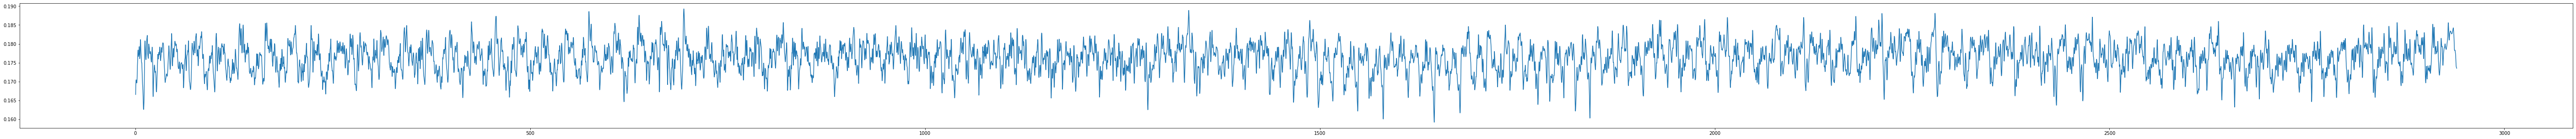

In [16]:
plt.figure(figsize=(100,5))
plt.plot(df.t,low_passed)
plt.show()

Direction

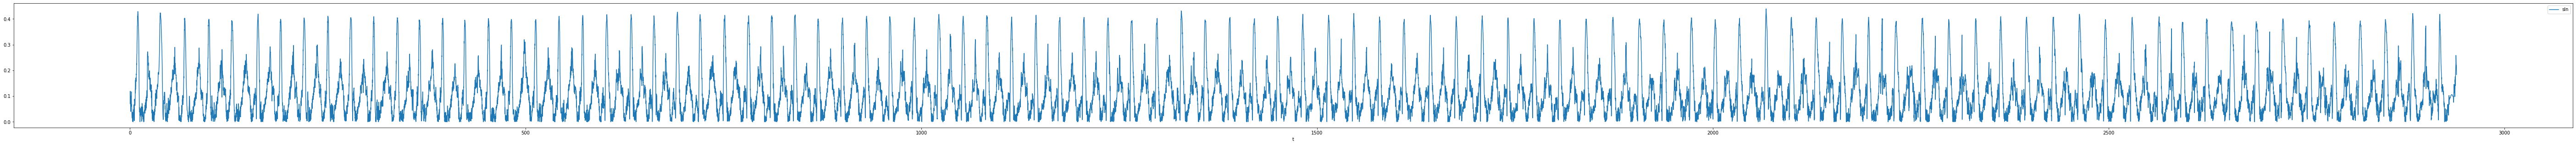

In [17]:
df.plot(x ='t', y='sln', kind = 'line',figsize=(100,5))
#plt.ylim(0,0.2)
plt.show()

Empty DataFrame
Columns: [index, t]
Index: []


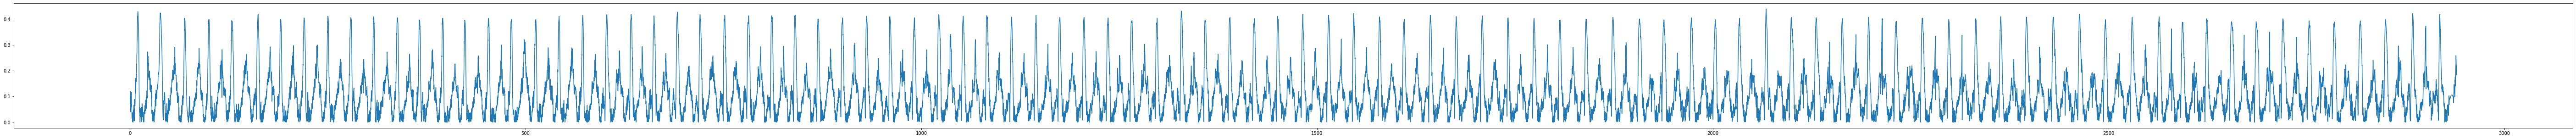

In [18]:
return_points,_=find_peaks(-df.sln,prominence=0.6)
time_return_points=pd.DataFrame(df.t[return_points],columns=['t']).reset_index()
print(time_return_points)
plt.figure(figsize=(100,5))
plt.plot(df.t,df.sln)
plt.plot(df.t[return_points], df.sln[return_points],"X",markerfacecolor='red',markersize=8)
plt.show()

In [ ]:
return_points_L =return_points[1::2]

In [ ]:
plt.figure(figsize=(100,5))
plt.plot(df.t,df.r_sdr,'r')
plt.plot(df.t,df.l_sdr,'b')
plt.plot(df.t[return_points], df.r_sdr[return_points],"X",markerfacecolor='red',markersize=8)
plt.plot(df.t[return_points], df.l_sdr[return_points],"X",markerfacecolor='black',markersize=8)
plt.show()

#if right shoulder value <left shoulder ,then man walking towards(front)

In [ ]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(df.t, df.r_sdr, k=4, s=0)
r_sdr_diff= spl.derivative()
spl = UnivariateSpline(df.t, df.l_sdr, k=4, s=0)
l_sdr_diff= spl.derivative()

plt.figure(figsize=(100,5))
plt.ylim(-0.25,0.25)
plt.plot(df.t,r_sdr_diff(df.t),'r')
plt.plot(df.t,l_sdr_diff(df.t),'b')
plt.plot(df.t[return_points], r_sdr_diff(df.t)[return_points],"X",markerfacecolor='green',markersize=8)
plt.plot(df.t[return_points], l_sdr_diff(df.t)[return_points],"X",markerfacecolor='black',markersize=8)
plt.show()

In [ ]:
diff_r=r_sdr_diff(df.t)[return_points]
diff_l=l_sdr_diff(df.t)[return_points]

if diff_r[0]>diff_l[0]:
    return_points_front = return_points[::2]
    return_points_back = return_points[1::2]
    plus = 1
    minus = 0
elif diff_l[0]>diff_r[0]:
    return_points_front = return_points[1::2]
    return_points_back = return_points[::2]
    plus = 0
    minus = 1
else:
    print('error')
    

## fS1- Lengths of  lower body

In [ ]:
lb=[]
for i in range(len(key_array)):
    t=key_array[i][11][3]
    l_xy=(thigh_r(i)+shank_r(i)+ankle_to_heel_r(i))/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    lb.append([l_xy])
    lb[i].append(right)
    lb[i].append(left)
    lb[i].append(t)
ratio_ub_lb=np.array(lb) 
df_lb = pd.DataFrame(ratio_ub_lb[4:],columns=['l_xy','r_sdr','l_sdr','t'])
print(df_lb)



In [ ]:
df_forward=df_lb[df.r_sdr < df.l_sdr] 
df_backward=df_lb[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_lb_avrg=avrg_value(forward_instants,0.3,0.90)
backward_lb_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_lb_avrg)
print (backward_lb_avrg)

In [ ]:
lbl_forward=list((map(lambda a : np.mean(a), forward_lb_avrg[plus::2])))
lbl_backward=list((map(lambda a : np.mean(a),backward_lb_avrg[minus::2])))
print(lbl_forward)
print('\n')
print(lbl_backward)

In [ ]:
S1=comb_dir_arrays(lbl_forward,lbl_backward,plus,minus)
print (S1)
print (len(S1))
S_f[0]=S1
print(S_f)

## fS2-shoulder Length

           l_xy     r_sdr     l_sdr            t
0      0.608165  0.640647  0.682299     2.287883
1      0.622757  0.639828  0.682525     2.390887
2      0.635263  0.639170  0.682745     2.493297
3      0.649048  0.638439  0.682906     2.597534
4      0.659497  0.638117  0.683190     2.701555
...         ...       ...       ...          ...
36992  0.540357  0.582869  0.622665  4127.216890
36993  0.573642  0.582117  0.623934  4127.336200
36994  0.609550  0.581033  0.625109  4127.457755
36995  0.624591  0.580919  0.625935  4127.572825
36996  0.628985  0.581189  0.626425  4127.689314

[36997 rows x 4 columns]


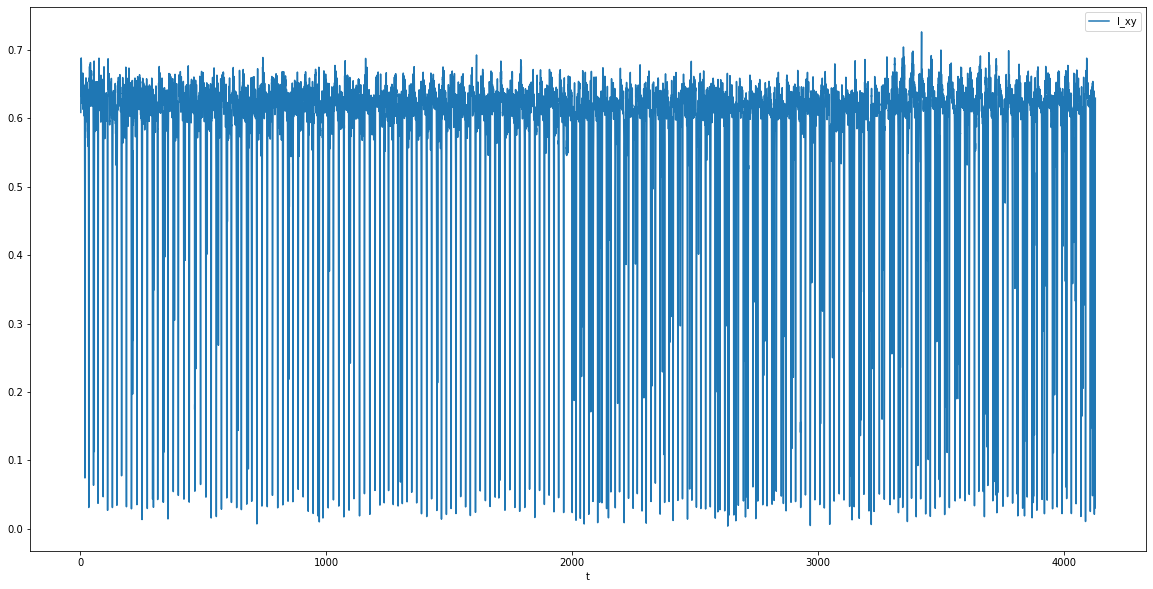

In [ ]:
sl=[]
for i in range(len(key_array)):
    t=key_array[i][11][3]
    l_xy=shoulder(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    sl.append([l_xy])
    sl[i].append(right)
    sl[i].append(left)
    sl[i].append(t)
shoulder_length=np.array(sl) 
df_sl = pd.DataFrame(shoulder_length[4:],columns=['l_xy','r_sdr','l_sdr','t'])
print(df_sl)
df_sl.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))


In [ ]:
df_forward=df_sl[df.r_sdr < df.l_sdr] 
df_backward=df_sl[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

       index      l_xy     r_sdr     l_sdr            t
0          0  0.608165  0.640647  0.682299     2.287883
1          1  0.622757  0.639828  0.682525     2.390887
2          2  0.635263  0.639170  0.682745     2.493297
3          3  0.649048  0.638439  0.682906     2.597534
4          4  0.659497  0.638117  0.683190     2.701555
...      ...       ...       ...       ...          ...
18999  36992  0.540357  0.582869  0.622665  4127.216890
19000  36993  0.573642  0.582117  0.623934  4127.336200
19001  36994  0.609550  0.581033  0.625109  4127.457755
19002  36995  0.624591  0.580919  0.625935  4127.572825
19003  36996  0.628985  0.581189  0.626425  4127.689314

[19004 rows x 5 columns]
       index      l_xy     r_sdr     l_sdr            t
0        159  0.265417  0.779828  0.709686    19.761482
1        160  0.325811  0.789765  0.704575    19.863567
2        161  0.388955  0.794185  0.694542    19.964748
3        162  0.402053  0.792370  0.690466    20.064664
4        163  0.445039

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

[[0.07446693878579912, 0.09053116769455878, 0.13857011096570654, 0.1648050681342721, 0.2078897157446155], [0.1776710405867874, 0.21624667544967605, 0.2714665679997786, 0.3142269658315913, 0.3307551358523009, 0.3904088796269382, 0.4386420685227244, 0.500598864962387, 0.5371689781081509, 0.5688107675935506, 0.6049608227007164, 0.6164617963003085, 0.6201584468788994, 0.630210754524843, 0.6414837210371797, 0.6474456084473239, 0.6511562357183802, 0.6519901323380038, 0.6537191839693905, 0.6587143895465714, 0.6567179626373445, 0.6530791311384684, 0.653560020487372, 0.661445811082618, 0.6725038268554795, 0.6751882424395533, 0.6719716390828181, 0.6573089744433654, 0.646214562009781, 0.6398035385661658, 0.6393888505367477, 0.6372455785691744, 0.6434098646584826, 0.6552144156183567, 0.6592601499855495, 0.672656429096242, 0.6756207605381369, 0.6773832626393989, 0.6734277761471513, 0.6724686078898644, 0.672382661623326, 0.6614226968226713, 0.6452122671641044, 0.6333066433956048, 0.633230483744714, 

In [ ]:
forward_sl_avrg=avrg_value(forward_instants,0.3,0.90)
backward_sl_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_sl_avrg)
print (backward_sl_avrg)

[0.15168758954998932, 0.6477925484093872, 0.18158868362066724, 0.6382427017225552, 0.07398936249922738, 0.6358220034987051, 0.13405137090079491, 0.6337044197639468, 0.12739719178808595, 0.6324328945313338, 0.22326412826889452, 0.634826369686321, 0.11630374817804638, 0.6284985852111112, 0.10343086600745263, 0.45362185042590875, 0.6316678848250642, 0.4303390819471729, 0.6337102467320637, 0.5277337715246962, 0.6338978437216626, 0.302691401182287, 0.6318880112950797, 0.16859970657698228, 0.6321422255605393, 0.262080162245639, 0.6263048193614835, 0.13504314562738504, 0.6372982137419874, 0.12314248437677458, 0.6277461957289905, 0.10980626176661032, 0.6288750386281199, 0.12166963847324659, 0.6260488591032506, 0.07215040759388126, 0.6340270874822567, 0.09524136708284532, 0.6353947443998273, 0.10589650359572497, 0.6318469335554764, 0.24019022086503636, 0.6283911785785478, 0.19538402494289903, 0.6298214398505105, 0.1278250160167172, 0.6308560650901442, 0.14275694683765885, nan, 0.633529964774233

In [ ]:
sl_forward=list((map(lambda a : np.mean(a), forward_sl_avrg[plus::2])))
sl_backward=list((map(lambda a : np.mean(a),backward_sl_avrg[minus::2])))
print(sl_forward)
print('\n')
print(sl_backward)

[0.6477925484093872, 0.6382427017225552, 0.6358220034987051, 0.6337044197639468, 0.6324328945313338, 0.634826369686321, 0.6284985852111112, 0.45362185042590875, 0.4303390819471729, 0.5277337715246962, 0.302691401182287, 0.16859970657698228, 0.262080162245639, 0.13504314562738504, 0.12314248437677458, 0.10980626176661032, 0.12166963847324659, 0.07215040759388126, 0.09524136708284532, 0.10589650359572497, 0.24019022086503636, 0.19538402494289903, 0.1278250160167172, 0.14275694683765885, 0.6335299647742331, 0.6333860342626835, 0.6334236568459842, 0.6276114176989346, 0.6333456198633446, 0.6342746731707904, 0.6233687133864622, 0.6271106222789987, 0.6275702178169447, 0.6297640874397241, 0.6331056737600717, 0.6327880508485564, 0.6285059767991877, 0.6335174488753677, 0.6310926229526724, 0.6331842771372295, 0.6353247469947766, 0.6322625016723018, 0.632511068354368, 0.6276588658766808, 0.6313780935941062, 0.6311971608840661, 0.6260598554320194, 0.6427067626144174, 0.6316642445426125, 0.118036364

In [ ]:
S2=comb_dir_arrays(sl_forward,sl_backward,plus,minus)
print (S2)
print (len(S2))
S_f[1]=S1
print(S_f)

[0.6193845877656745, 0.6477925484093872, 0.6226509533229017, 0.6382427017225552, 0.6148965946679484, 0.6358220034987051, 0.6102500844199441, 0.6337044197639468, 0.6225700504588041, 0.6324328945313338, 0.6208690979291347, 0.634826369686321, 0.624623784157287, 0.6284985852111112, 0.576610598485959, 0.45362185042590875, 0.13583011973704917, 0.4303390819471729, 0.08117164637660487, 0.5277337715246962, 0.06990596535368147, 0.302691401182287, 0.10554241741803778, 0.16859970657698228, 0.13367664615779096, 0.262080162245639, 0.139501075236731, 0.13504314562738504, 0.10172102920913495, 0.12314248437677458, 0.08154183513617333, 0.10980626176661032, 0.14414886293396423, 0.12166963847324659, 0.10938405330499303, 0.07215040759388126, 0.05898280328227249, 0.09524136708284532, 0.09617997279897592, 0.10589650359572497, 0.13459788476246212, 0.24019022086503636, 0.18596182361550329, 0.19538402494289903, 0.16789685480458402, 0.1278250160167172, 0.1372918417818244, 0.14275694683765885, 0.6068743370928513,

## fS3 Hip size

           l_xy     r_sdr     l_sdr            t
0      0.379275  0.640647  0.682299     2.287883
1      0.389321  0.639828  0.682525     2.390887
2      0.394557  0.639170  0.682745     2.493297
3      0.403667  0.638439  0.682906     2.597534
4      0.406871  0.638117  0.683190     2.701555
...         ...       ...       ...          ...
36992  0.296572  0.582869  0.622665  4127.216890
36993  0.308474  0.582117  0.623934  4127.336200
36994  0.331054  0.581033  0.625109  4127.457755
36995  0.346725  0.580919  0.625935  4127.572825
36996  0.347548  0.581189  0.626425  4127.689314

[36997 rows x 4 columns]


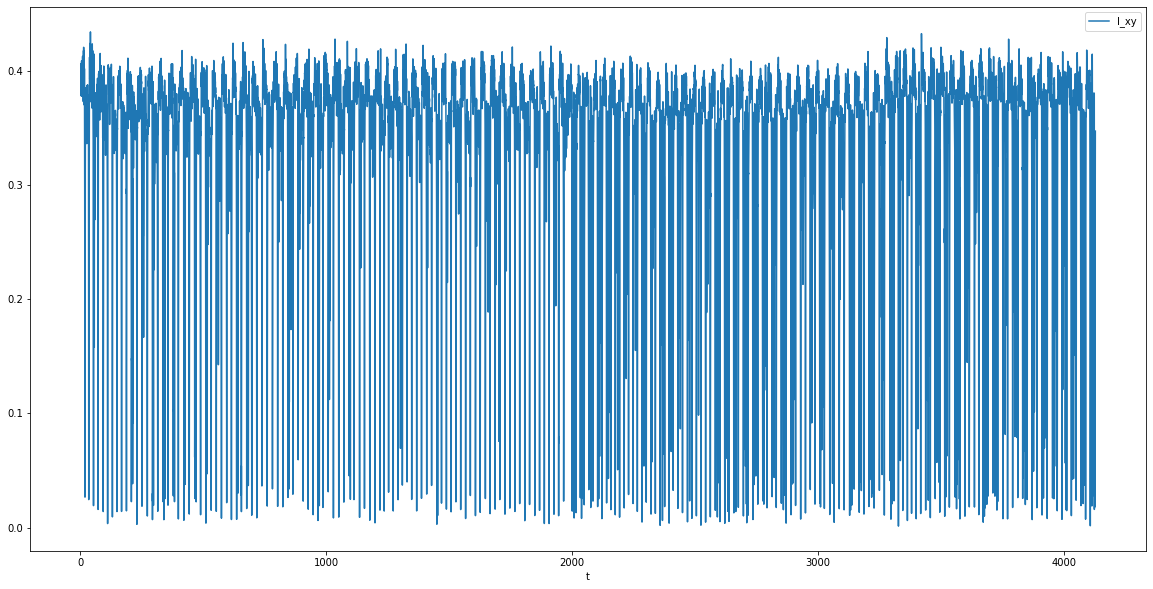

In [ ]:
hip=[]
for i in range(len(key_array)):
    t=key_array[i][23][3]
    l_xy=hip_size(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    hip.append([l_xy])
    hip[i].append(right)
    hip[i].append(left)
    hip[i].append(t)
hip_size=np.array(hip) 
df_hip = pd.DataFrame(hip_size[4:],columns=['l_xy','r_sdr','l_sdr','t'])
print(df_hip)
df_hip.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))


In [ ]:
df_forward=df_hip[df.r_sdr < df.l_sdr] 
df_backward=df_hip[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

       index      l_xy     r_sdr     l_sdr            t
0          0  0.379275  0.640647  0.682299     2.287883
1          1  0.389321  0.639828  0.682525     2.390887
2          2  0.394557  0.639170  0.682745     2.493297
3          3  0.403667  0.638439  0.682906     2.597534
4          4  0.406871  0.638117  0.683190     2.701555
...      ...       ...       ...       ...          ...
18999  36992  0.296572  0.582869  0.622665  4127.216890
19000  36993  0.308474  0.582117  0.623934  4127.336200
19001  36994  0.331054  0.581033  0.625109  4127.457755
19002  36995  0.346725  0.580919  0.625935  4127.572825
19003  36996  0.347548  0.581189  0.626425  4127.689314

[19004 rows x 5 columns]
       index      l_xy     r_sdr     l_sdr            t
0        159  0.174508  0.779828  0.709686    19.761482
1        160  0.202393  0.789765  0.704575    19.863567
2        161  0.238256  0.794185  0.694542    19.964748
3        162  0.256583  0.792370  0.690466    20.064664
4        163  0.282717

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_hp_avrg=avrg_value(forward_instants,0.3,0.90)
backward_hp_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_hp_avrg)
print (backward_hp_avrg)

In [ ]:
hp_forward=list((map(lambda a : np.mean(a), forward_hp_avrg[plus::2])))
hp_backward=list((map(lambda a : np.mean(a),backward_hp_avrg[minus::2])))
print(hp_forward)
print('\n')
print(hp_backward)

In [ ]:
S3=comb_dir_arrays(hp_forward,hp_backward,plus,minus)
print (S3)
print (len(S3))
S_f[2]=S3
print(S_f)

## fS4-Length of upper arm(right hand)

In [ ]:
u_arm=[]
for i in range(len(key_array)):
    t=key_array[i][12][3]
    l_xy_r=upper_arm_r(i)/ubl(i)
    l_xy_l=upper_arm_l(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    u_arm.append([l_xy_r])
    u_arm[i].append(l_xy_l)
    u_arm[i].append(right)
    u_arm[i].append(left)
    u_arm[i].append(t)
upper_arm=np.array(u_arm) 
df_u_arm = pd.DataFrame(upper_arm,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t'])
print(df_u_arm)
df_u_arm.plot(x ='t',y='l_xy_r' ,kind = 'line',figsize=(20,10))
df_u_arm.plot(x ='t',y='l_xy_l' ,kind = 'line',figsize=(20,10))


In [ ]:
df_forward=df_u_arm[df.r_sdr < df.l_sdr] 
df_backward=df_u_arm[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_r,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_r,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_uarm_r_avrg=avrg_value(forward_instants,0.3,0.90)
backward_uarm_r_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_uarm_r_avrg)
print(backward_uarm_r_avrg)

[nan, 0.5389612283529448, 0.5442526069091946, 0.5370442698714675, nan, 0.5369938781375404, nan, 0.5346211953246301, nan, 0.5381298176990582, 0.5351208075448445, 0.536773080436301, nan, 0.5270480119967428, 0.5695992337925709, nan, 0.5316371901004655, 0.5578998315680668, 0.5324059394646112, 0.5493787540808308, 0.5372458348538232, 0.5145290274976123, 0.5315637648551392, 0.5509424149301684, 0.5369103946142801, 0.4686921490766769, 0.5354995018573546, nan, 0.5351102824848963, nan, 0.5397496739632132, nan, 0.5378848537051312, 0.5191624405666159, 0.5357912901129124, nan, 0.5377044273926646, nan, 0.5351272655152622, nan, 0.5401675915497328, nan, 0.5343288078383479, nan, 0.5324383169004318, nan, 0.5315941683434355, nan, nan, 0.5316215025996658, nan, 0.5351829798946439, nan, 0.5379367735916555, 0.5303591127894721, 0.5361658270489552, nan, 0.536412223816846, nan, 0.5392919731859498, nan, 0.5255704149690813, nan, 0.5364643346951504, nan, 0.5374434529318098, nan, 0.5380136247704655, nan, 0.539088029

In [ ]:
uarm_forward_r=list((map(lambda a : np.mean(a), forward_uarm_r_avrg[plus::2])))
uarm_backward_r=list((map(lambda a : np.mean(a),backward_uarm_r_avrg[minus::2])))
print(uarm_forward_r)
print('\n')
print(uarm_backward_r)

[0.5389612283529448, 0.5370442698714675, 0.5369938781375404, 0.5346211953246301, 0.5381298176990582, 0.536773080436301, 0.5270480119967428, nan, 0.5578998315680668, 0.5493787540808308, 0.5145290274976123, 0.5509424149301684, 0.4686921490766769, nan, nan, nan, 0.5191624405666159, nan, nan, nan, nan, nan, nan, nan, 0.5316215025996658, 0.5351829798946439, 0.5379367735916555, 0.5361658270489552, 0.536412223816846, 0.5392919731859498, 0.5255704149690813, 0.5364643346951504, 0.5374434529318098, 0.5380136247704655, 0.5390880292480661, 0.5368401497116845, 0.5388229429706787, 0.5346605625000207, 0.5351803558758605, 0.5375648080644637, 0.5379847325498943, 0.5360130562628118, 0.5388865449620986, 0.5318620131433504, 0.5313834725271712, 0.5410641740808039, 0.5372350846164797, 0.5392513063519506, 0.5391147102474946, nan, 0.5443952711212218, 0.5440511797891734, 0.539978543994876, 0.5428219495343732, 0.5330395427308172, 0.5293616146795692, 0.5468531633427982, nan, nan, 0.518890644704041, 0.51624395332

In [ ]:
S4=comb_dir_arrays(uarm_forward_r,uarm_backward_r,plus,minus)
print (S4)
print (len(S4))
S_f[3][0]=S4
print(S_f)

[0.5414901131518364, 0.5389612283529448, 0.5383719856476771, 0.5370442698714675, 0.5397570341362172, 0.5369938781375404, 0.5411096751748218, 0.5346211953246301, 0.5405628916198423, 0.5381298176990582, 0.5366582876213746, 0.536773080436301, 0.5350099369908085, 0.5270480119967428, 0.5650124656104886, nan, nan, 0.5578998315680668, nan, 0.5493787540808308, nan, 0.5145290274976123, nan, 0.5509424149301684, nan, 0.4686921490766769, nan, nan, nan, nan, nan, nan, nan, 0.5191624405666159, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.5346190609142639, 0.5316215025996658, 0.5323096701489026, 0.5351829798946439, 0.53045120018677, 0.5379367735916555, 0.5321636386392523, 0.5361658270489552, 0.5349654700017261, 0.536412223816846, 0.53849740338959, 0.5392919731859498, 0.5302387322354285, 0.5255704149690813, 0.5274644725899363, 0.5364643346951504, 0.5337537260989326, 0.5374434529318098, 0.529446262097664, 0.5380136247704655, 0.5287402503767121, 0.5390880292480661, 0.526233157

## fS5-Length of upper arm(Left hand)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_l,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_l,time_return_points)
print(forward_instants)
print(backward_instants)

[[0.4865993126288416], [0.5545462716460839, 0.5585679677224862, 0.5599758272770398, 0.5713340991296049, 0.5782927954966821, 0.586153100239642, 0.5980514367923342, 0.6024538105793933, 0.6075050677810291, 0.597766561665488, 0.5842505899170386, 0.5743473886468247, 0.555977693323232, 0.5453377993209051, 0.546204582581111, 0.5461206836767488, 0.5440574882011506, 0.5412029485960629, 0.5353468328531564, 0.5330948590745176, 0.529198251894814, 0.5277743646350052, 0.5242844619975816, 0.5220238172035309, 0.5203883303443828, 0.5161362195790372, 0.5114774813736747, 0.5119618044905458, 0.5107080015354731, 0.5099954795205123, 0.5158079531393958, 0.5141579153761286, 0.5156590119263598, 0.5206925209289439, 0.5266401577139809, 0.5350537605654981, 0.5397569025547915, 0.5387243153109164, 0.5397015649039076, 0.5357217083711712, 0.535887034662274, 0.5324313773734521, 0.5270141250960286, 0.5277494813537029, 0.5308151129063551, 0.5400787761695812, 0.5307744655017962, 0.531963959819151, 0.5328078397694292, 0.5

In [ ]:
forward_uarm_l_avrg=avrg_value(forward_instants,0.3,0.90)
backward_uarm_l_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_uarm_l_avrg)
print (backward_uarm_l_avrg)

In [ ]:
uarm_forward_L=list((map(lambda a : np.mean(a), forward_uarm_l_avrg[plus::2])))
uarm_backward_L=list((map(lambda a : np.mean(a),backward_uarm_l_avrg[minus::2])))
print(uarm_forward_L)
print('\n')
print(uarm_backward_L)

In [ ]:
S5=comb_dir_arrays(uarm_forward_L,uarm_backward_L,plus,minus)
print (S5)
print (len(S5))
S_f[3][1]=S5
print(S_f)

## fS6-Length of lower arm(right hand)

In [ ]:
l_arm=[]
for i in range(len(key_array)):
    t=key_array[i][14][3]
    l_xy_r=lower_arm_r(i)/ubl(i)
    l_xy_l=lower_arm_l(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    l_arm.append([l_xy_r])
    l_arm[i].append(l_xy_l)
    l_arm[i].append(right)
    l_arm[i].append(left)
    l_arm[i].append(t)
lower_arm=np.array(l_arm) 
df_l_arm = pd.DataFrame(lower_arm,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t'])
print(df_l_arm)
df_l_arm.plot(x ='t',y='l_xy_r' ,kind = 'line',figsize=(20,10))
df_l_arm.plot(x ='t',y='l_xy_l' ,kind = 'line',figsize=(20,10))


In [ ]:
df_forward=df_l_arm[df.r_sdr < df.l_sdr] 
df_backward=df_l_arm[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_r,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_r,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_larm_r_avrg=avrg_value(forward_instants,0.3,0.90)
backward_larm_r_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_larm_r_avrg)
print (backward_larm_r_avrg)

In [ ]:
larm_forward_r=list((map(lambda a : np.mean(a), forward_larm_r_avrg[plus::2])))
larm_backward_r=list((map(lambda a : np.mean(a),backward_larm_r_avrg[minus::2])))
print(larm_forward_r)
print('\n')
print(larm_backward_r)

In [ ]:
S6=comb_dir_arrays(larm_forward_r,larm_backward_r,plus,minus)
print (S6)
print (len(S6))
S_f[4][0]=S6
print(S_f)

## fS7-Length of lower arm(left hand)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_l,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_l,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_larm_l_avrg=avrg_value(forward_instants,0.3,0.90)
backward_larm_l_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_larm_l_avrg)
print (backward_larm_l_avrg)

In [ ]:
larm_forward_L=list((map(lambda a : np.mean(a), forward_larm_l_avrg[plus::2])))
larm_backward_L=list((map(lambda a : np.mean(a),backward_larm_l_avrg[minus::2])))
print(larm_forward_L)
print('\n')
print(larm_backward_L)

In [ ]:
S7=comb_dir_arrays(larm_forward_L,larm_backward_L,plus,minus)
print (S7)
print (len(S7))
S_f[4][1]=S7
print(S_f)

## fS8-Length of arm(right hand)
### (Upper arm + lower arm + palm to finger)


In [ ]:
arm=[]
for i in range(len(key_array)):
    t=key_array[i][12][3]
    l_xy_r=upper_arm_r(i)+lower_arm_r(i)+palm_to_finger_r(i)/ubl(i)
    l_xy_l=upper_arm_l(i)+lower_arm_l(i)+palm_to_finger_l(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    arm.append([l_xy_r])
    arm[i].append(l_xy_l)
    arm[i].append(right)
    arm[i].append(left)
    arm[i].append(t)
Length_of_arm=np.array(arm) 
df_arm = pd.DataFrame(Length_of_arm,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t'])
print(df_arm)
df_arm.plot(x ='t',y='l_xy_r' ,kind = 'line',figsize=(20,10))
df_arm.plot(x ='t',y='l_xy_l' ,kind = 'line',figsize=(20,10))



In [ ]:
df_forward=df_arm[df.r_sdr < df.l_sdr] 
df_backward=df_arm[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_r,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_r,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_arm_r_avrg=avrg_value(forward_instants,0.3,0.90)
backward_arm_r_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_arm_r_avrg)
print (backward_arm_r_avrg)

In [ ]:
arm_forward_r=list((map(lambda a : np.mean(a), forward_arm_r_avrg[plus::2])))
arm_backward_r=list((map(lambda a : np.mean(a),backward_arm_r_avrg[minus::2])))
print(arm_forward_r)
print('\n')
print(arm_backward_r)

In [ ]:
S8=comb_dir_arrays(arm_forward_r,arm_backward_r,plus,minus)
print (S8)
print (len(S8))
S_f[5][0]=S8
print(S_f)

## fS9-Length of arm(left hand)
### (Upper arm + lower arm + palm to finger)


In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_l,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_l,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_arm_l_avrg=avrg_value(forward_instants,0.3,0.90)
backward_arm_l_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_arm_l_avrg)
print (backward_arm_l_avrg)

In [ ]:
arm_forward_l=list((map(lambda a : np.mean(a), forward_arm_l_avrg[plus::2])))
arm_backward_l=list((map(lambda a : np.mean(a),backward_arm_l_avrg[minus::2])))
print(arm_forward_l)
print('\n')
print(arm_backward_l)

In [ ]:
S9=comb_dir_arrays(arm_forward_l,arm_backward_l,plus,minus)
print (S9)
print (len(S9))
S_f[5][1]=S9
print(S_f)

## fS10-Length of thigh(Right)

In [ ]:
th=[]
for i in range(len(key_array)):
    t=key_array[i][24][3]
    l_xy_r=thigh_r(i)/ubl(i)
    l_xy_l=thigh_l(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    th.append([l_xy_r])
    th[i].append(l_xy_l)
    th[i].append(right)
    th[i].append(left)
    th[i].append(t)
thigh=np.array(th) 
df_thigh= pd.DataFrame(thigh,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t'])
print(df_thigh)
df_thigh.plot(x ='t',y='l_xy_r' ,kind = 'line',figsize=(20,10))
df_thigh.plot(x ='t',y='l_xy_l' ,kind = 'line',figsize=(20,10))


In [ ]:
df_forward=df_thigh[df.r_sdr < df.l_sdr] 
df_backward=df_thigh[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_r,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_r,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_thigh_r_avrg=avrg_value(forward_instants,0.3,0.90)
backward_thigh_r_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_thigh_r_avrg)
print (backward_thigh_r_avrg)

In [ ]:
thigh_forward_r=list((map(lambda a : np.mean(a), forward_thigh_r_avrg[plus::2])))
thigh_backward_r=list((map(lambda a : np.mean(a),backward_thigh_r_avrg[minus::2])))
print(thigh_forward_r)
print('\n')
print(thigh_backward_r)

In [ ]:
S10=comb_dir_arrays(thigh_forward_r,thigh_backward_r,plus,minus)
print (S10)
print (len(S10))
S_f[6][0]=S10
print(S_f)

## fS11-Length of thigh(Left)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_l,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_l,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_thigh_l_avrg=avrg_value(forward_instants,0.3,0.90)
backward_thigh_l_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_thigh_l_avrg)
print (backward_thigh_l_avrg)

In [ ]:
thigh_forward_l=list((map(lambda a : np.mean(a), forward_thigh_l_avrg[plus::2])))
thigh_backward_l=list((map(lambda a : np.mean(a),backward_thigh_l_avrg[minus::2])))
print(thigh_forward_l)
print('\n')
print(thigh_backward_l)

In [ ]:
S11=comb_dir_arrays(thigh_forward_l,thigh_backward_l,plus,minus)
print (S11)
print (len(S11))
S_f[6][1]=S11
print(S_f)

## fS12- Length of shank(right)

In [ ]:
shk=[]
for i in range(len(key_array)):
    t=key_array[i][26][3]
    l_xy_r=shank_r(i)/ubl(i)
    l_xy_l=shank_r(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    shk.append([l_xy_r])
    shk[i].append(l_xy_l)
    shk[i].append(right)
    shk[i].append(left)
    shk[i].append(t)
shank=np.array(shk) 
df_shk = pd.DataFrame(shank,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t'])
print(df_shk)
df_shk.plot(x ='t',y='l_xy_r' ,kind = 'line',figsize=(20,10))
df_shk.plot(x ='t',y='l_xy_l' ,kind = 'line',figsize=(20,10))



In [ ]:
df_forward=df_shk[df.r_sdr < df.l_sdr] 
df_backward=df_shk[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_r,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_r,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_shank_r_avrg=avrg_value(forward_instants,0.3,0.90)
backward_shank_r_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_shank_r_avrg)
print (backward_shank_r_avrg)

In [ ]:
shank_forward_r=list((map(lambda a : np.mean(a), forward_shank_r_avrg[plus::2])))
shank_backward_r=list((map(lambda a : np.mean(a),backward_shank_r_avrg[minus::2])))
print(shank_forward_r)
print('\n')
print(shank_backward_r)

In [ ]:
S12=comb_dir_arrays(shank_forward_r,shank_backward_r,plus,minus)
print (S12)
print (len(S12))
S_f[7][0]=S12
print(S_f)

## fS13- Length of shank(left)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy_l,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy_l,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_shank_l_avrg=avrg_value(forward_instants,0.3,0.90)
backward_shank_l_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_shank_l_avrg)
print (backward_shank_l_avrg)

In [ ]:
shank_forward_l=list((map(lambda a : np.mean(a), forward_shank_l_avrg[plus::2])))
shank_backward_l=list((map(lambda a : np.mean(a),backward_shank_l_avrg[minus::2])))
print(shank_forward_l)
print('\n')
print(shank_backward_l)

In [ ]:
S13=comb_dir_arrays(shank_forward_l,shank_backward_l,plus,minus)
print (S13)
print (len(S13))
S_f[7][1]=S13
print(S_f)

## fs14-Face width Ear to Ear


In [ ]:
Face_width=[]
for i in range(len(key_array)):
    t=key_array[i][8][3]
    l_xy=face_width(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    Face_width.append([l_xy])
    Face_width[i].append(right)
    Face_width[i].append(left)
    Face_width[i].append(t)
Face_width_ear_to_ear=np.array(Face_width) 
df_Face_width = pd.DataFrame(Face_width_ear_to_ear,columns=['l_xy','r_sdr','l_sdr','t'])
print(df_Face_width)
df_Face_width.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))

In [ ]:
df_forward=df_Face_width[df.r_sdr < df.l_sdr] 
df_backward=df_Face_width[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_face_width_avrg=avrg_value(forward_instants,0.3,0.90)
backward_face_width_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_face_width_avrg)
print (backward_face_width_avrg)

In [ ]:
face_width_forward=list((map(lambda a : np.mean(a), forward_face_width_avrg[plus::2])))
face_width_backward=list((map(lambda a : np.mean(a),backward_face_width_avrg[minus::2])))
print(face_width_forward)
print('\n')
print(face_width_backward)

In [ ]:
S14=comb_dir_arrays(face_width_forward,face_width_backward,plus,minus)
print (S14)
print (len(S14))
S_f[8]=S14
print(S_f)

## fs15 Mouth width

In [ ]:
mouth=[]
for i in range(len(key_array)):
    t=key_array[i][9][3]
    l_xy=mouth_width(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    mouth.append([l_xy])
    mouth[i].append(right)
    mouth[i].append(left)
    mouth[i].append(t)
mouth_width=np.array(mouth) 
df_mouth = pd.DataFrame(mouth_width,columns=['l_xy','r_sdr','l_sdr','t'])
print(df_mouth)
df_mouth.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))

In [ ]:
df_forward=df_mouth[df.r_sdr < df.l_sdr] 
df_backward=df_mouth[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

[[0.011813980710753085], [0.00957559606777926, 0.011965473350859816, 0.012679809858850168, 0.015131706973296506, 0.01766006395842696, 0.020619573980851885, 0.028767431470548367, 0.029681407795099517, 0.03778072625780092, 0.04628494745974331, 0.05071911594335605, 0.053198267878660506, 0.05797310719923761, 0.057328570195322004, 0.05990262094202861, 0.06655809154554007, 0.07204892856897398, 0.08007156573788761, 0.0847547534520372, 0.083368863702118, 0.08110857412039961, 0.08083413824225918, 0.0804884562730537, 0.08130709523736294, 0.08286456113956982, 0.08780886075170738, 0.08816248272625245, 0.08807474559487016, 0.08616766020766391, 0.08596160643784803, 0.08462407803723447, 0.08735347468170188, 0.0876745784438214, 0.08993226952365765, 0.09089050367609186, 0.09463115580237971, 0.09690724543457624, 0.09796145396415003, 0.09608437923174774, 0.09785389725525938, 0.09710831198124274, 0.09713306444601869, 0.09729909095374702, 0.09989648946331982, 0.10120344523205277, 0.09911058761231971, 0.099

In [ ]:
forward_mouth_avrg=avrg_value(forward_instants,0.3,0.90)
backward_mouth_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_mouth_avrg)
print (backward_mouth_avrg)

[nan, 0.09048094117840398, 0.015635677358734754, 0.09972585623290235, nan, 0.10063094242245911, nan, 0.1002382005394269, nan, 0.09530024092294055, 0.011529765531538075, 0.09876321425046745, nan, 0.09713080757763912, 0.012984968953534803, nan, 0.09804810324613798, 0.022955161299095767, 0.09947307398702435, 0.03710232789317068, 0.09734956298012502, 0.011042874140913908, 0.09980346106996234, 0.013388388117636622, 0.09830218879585348, 0.02680519202771587, 0.09611704325528965, nan, 0.09648868847741551, nan, 0.09856695523759963, nan, 0.09724864460932692, 0.014454443369518967, 0.09878963550898745, nan, 0.09497841719628874, nan, 0.0995035581485807, nan, 0.095403404802233, nan, 0.0957024494753764, nan, 0.09798467225637322, nan, 0.0987023231448683, nan, nan, 0.09916488847361075, nan, 0.0967942781955365, nan, 0.0965780213331642, 0.02146362398866273, 0.09877226647965222, nan, 0.09392235115061544, nan, 0.09789015606053748, nan, 0.09760564497100109, nan, 0.09475931798585276, nan, 0.09683552640583593

In [ ]:
mouth_forward=list((map(lambda a : np.mean(a), forward_mouth_avrg[plus::2])))
mouth_backward=list((map(lambda a : np.mean(a),backward_mouth_avrg[minus::2])))
print(mouth_forward)
print('\n')
print(mouth_backward)

[0.09048094117840398, 0.09972585623290235, 0.10063094242245911, 0.1002382005394269, 0.09530024092294055, 0.09876321425046745, 0.09713080757763912, nan, 0.022955161299095767, 0.03710232789317068, 0.011042874140913908, 0.013388388117636622, 0.02680519202771587, nan, nan, nan, 0.014454443369518967, nan, nan, nan, nan, nan, nan, nan, 0.09916488847361075, 0.0967942781955365, 0.0965780213331642, 0.09877226647965222, 0.09392235115061544, 0.09789015606053748, 0.09760564497100109, 0.09475931798585276, 0.09683552640583593, 0.0976552732518475, 0.09738068982610272, 0.09728118514007832, 0.0952688513181048, 0.1008784464035408, 0.09423098329101653, 0.09692845547025335, 0.1007553041194734, 0.09605201402366448, 0.09818944043005978, 0.09738150336663508, 0.09804272866734622, 0.09930612770084099, 0.09752879927104975, 0.0961500497197145, 0.09448358719829554, nan, 0.012158506816485634, 0.012874792809173162, 0.017738821351389985, 0.01326046162365225, 0.09714485388115293, 0.024253170071286557, 0.0122653773817

In [ ]:
S15=comb_dir_arrays(mouth_forward,mouth_backward,plus,minus)
print (S15)
print (len(S15))
S_f[9]=S15
print(S_f)

[0.05972750380876751, 0.09048094117840398, 0.06234895714932057, 0.09972585623290235, 0.06124168043876889, 0.10063094242245911, 0.06199685568561726, 0.1002382005394269, 0.0616887878706993, 0.09530024092294055, 0.06384038089518249, 0.09876321425046745, 0.06356136991279977, 0.09713080757763912, 0.05747774935223741, nan, nan, 0.022955161299095767, nan, 0.03710232789317068, nan, 0.011042874140913908, nan, 0.013388388117636622, nan, 0.02680519202771587, nan, nan, nan, nan, nan, nan, nan, 0.014454443369518967, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0612935771899709, 0.09916488847361075, 0.06027313656045487, 0.0967942781955365, 0.06552958985135271, 0.0965780213331642, 0.06057084221069728, 0.09877226647965222, 0.06701400391453016, 0.09392235115061544, 0.062275435020910645, 0.09789015606053748, 0.06523141722883574, 0.09760564497100109, 0.0654885671384328, 0.09475931798585276, 0.06379331994983298, 0.09683552640583593, 0.06183594244661046, 0.0976552732518475, 0.062

## fs16Eye size

In [ ]:
eye=[]
for i in range(len(key_array)):
    t=key_array[i][6][3]
    l_xy=eye_size(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    eye.append([l_xy])
    eye[i].append(right)
    eye[i].append(left)
    eye[i].append(t)
eye_width=np.array(eye) 
df_eye = pd.DataFrame(eye_width,columns=['l_xy','r_sdr','l_sdr','t'])
print(df_eye)
df_eye.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))
    

In [ ]:
df_forward=df_eye[df.r_sdr < df.l_sdr] 
df_backward=df_eye[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_eyes_avrg=avrg_value(forward_instants,0.3,0.90)
backward_eyes_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_eyes_avrg)
print (backward_eyes_avrg)

In [ ]:
eyes_forward=list((map(lambda a : np.mean(a), forward_eyes_avrg[plus::2])))
eyes_backward=list((map(lambda a : np.mean(a),backward_eyes_avrg[minus::2])))
print(eyes_forward)
print('\n')
print(eyes_backward)

In [ ]:
S16=comb_dir_arrays(eyes_forward,eyes_backward,plus,minus)
print (S16)
print (len(S16))
S_f[10]=S16
print(S_f)

## fs17-Distance between eyes Midpoints

In [ ]:
eyes_mid=[]
for i in range(len(key_array)):
    t=key_array[i][5][3]
    l_xy=eyes_midpoints(i)/ubl(i)
    right = key_array[i][12][0]
    left = key_array[i][11][0]
    eyes_mid.append([l_xy])
    eyes_mid[i].append(right)
    eyes_mid[i].append(left)
    eyes_mid[i].append(t)
eyes_mid_width=np.array(eyes_mid) 
df_eyes_mid = pd.DataFrame(eyes_mid_width,columns=['l_xy','r_sdr','l_sdr','t'])
print(df_eyes_mid)
df_eyes_mid.plot(x ='t',y='l_xy' ,kind = 'line',figsize=(20,10))
    

In [ ]:
df_forward=df_eyes_mid[df.r_sdr < df.l_sdr] 
df_backward=df_eyes_mid[df.r_sdr > df.l_sdr]
df_forward =df_forward.reset_index()
df_backward=df_backward.reset_index()
print(df_forward)
print(df_backward)

In [ ]:
forward_instants=sample(df_forward,df_forward.l_xy,time_return_points)
backward_instants=sample(df_backward,df_backward.l_xy,time_return_points)
print(forward_instants)
print(backward_instants)

In [ ]:
forward_eyes_mid_avrg=avrg_value(forward_instants,0.3,0.90)
backward_eyes_mid_avrg=avrg_value(backward_instants,0.3,0.90)
print(forward_eyes_mid_avrg)
print (backward_eyes_mid_avrg)

In [ ]:
eyes_mid_forward=list((map(lambda a : np.mean(a), forward_eyes_mid_avrg[plus::2])))
eyes_mid_backward=list((map(lambda a : np.mean(a),backward_eyes_mid_avrg[minus::2])))
print(eyes_mid_forward)
print('\n')
print(eyes_mid_backward)

In [ ]:
S17=comb_dir_arrays(eyes_mid_forward,eyes_mid_backward,plus,minus)
print (S17)
print (len(S17))
S_f[11]=S17
print(S_f)

In [ ]:
import pickle
output = open('Front_static_gayanjali.pkl', 'wb')
pickle.dump(S_f, output)
output.close()

In [ ]:
from google.colab import files
files.download('Front_static_gayanjali.pkl')